In [14]:
import pandas as pd
df = pd.read_excel (r'C:\Users\Igor_Leuchyk\Desktop\Useful_materials\Personal\RD_DS\DFs\data.xls')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
...,...,...,...,...,...
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2415.000000,2415.000000,2415.000000,2415.000000
mean,6.470257,3.963540,4.616911,2.189752
std,2.140522,1.022686,1.987028,1.046936
min,-10.000000,0.000000,0.000000,0.000000
25%,5.950000,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [16]:
df.isnull().sum()

sepal_length    9
sepal_width     9
petal_length    9
petal_width     9
species         0
dtype: int64

In [17]:
# As we can see, min for columns 0-1 contain values =< 0 which is strange for width / length indicators
# Also these columns conatain nulls (9 for each column)

Text(0, 0.5, 'frequency')

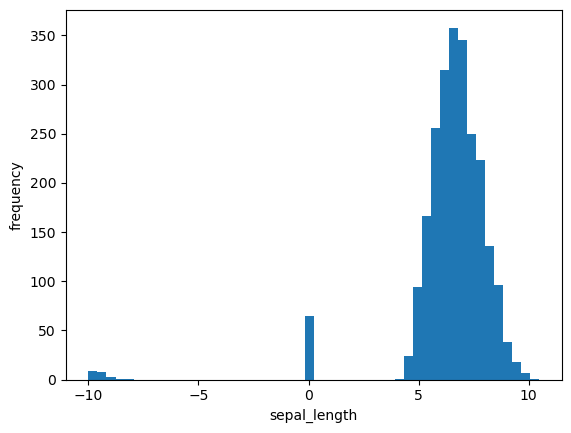

In [18]:
import matplotlib.pyplot as plt
df['sepal_length'].plot.hist(bins = 50, label = 'sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

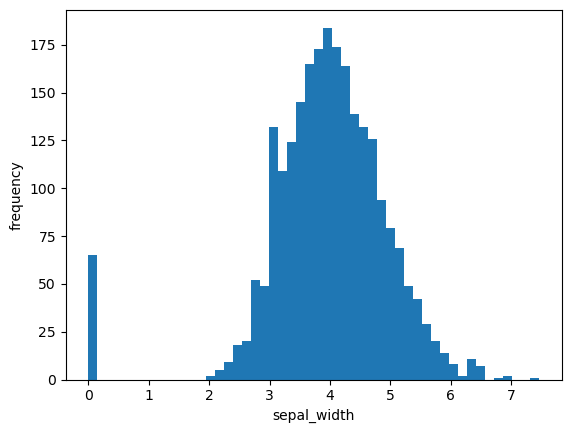

In [19]:
df['sepal_width'].plot.hist(bins = 50, label = 'sepal_width')
plt.xlabel('sepal_width')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

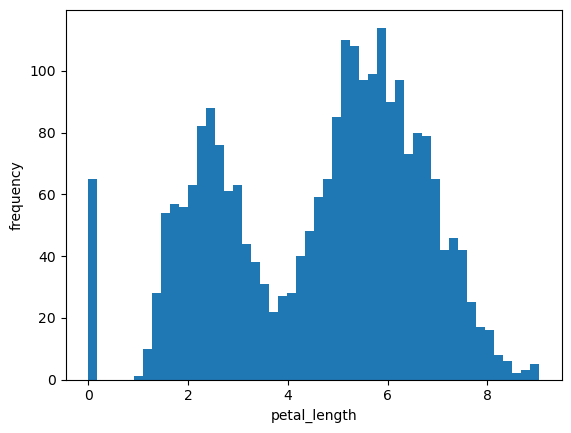

In [20]:
df['petal_length'].plot.hist(bins = 50, label = 'petal_length')
plt.xlabel('petal_length')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

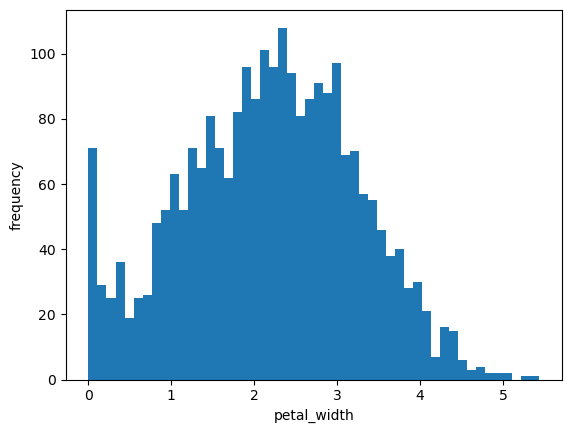

In [21]:
df['petal_width'].plot.hist(bins = 50, label = 'petal_width')
plt.xlabel('petal_width')
plt.ylabel('frequency')

In [22]:
# According to graphics above, allocation in columns # 0-3 is not normal. I guess it is because of nulls + min for all these columns is <= 0 which is not OK
# I believe that it would be better to replace nulls / 0 and below zero values with medians, In my opinion it will help us to fix the DB (in case we cannot request good data)

In [54]:
df0 = df.fillna(df.median(numeric_only = True), axis = 0)

In [55]:
df0.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [56]:
df1 = df0.drop(columns = ['species'])

In [57]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.40,2.70,5.30,1.90
1,7.38,4.04,5.15,2.37
2,5.00,3.40,1.60,0.40
3,6.12,3.19,5.90,2.01
4,6.78,3.47,6.13,2.29


In [73]:
median1_df1 = df1['sepal_length'].median()

In [74]:
median2_df1 = df1['sepal_width'].median()

In [75]:
median3_df1 = df1['petal_length'].median()

In [76]:
median4_df1 = df1['petal_width'].median()

In [80]:
df1.loc[df1.sepal_length <= 0, 'sepal_length'] = median1_df1

In [81]:
df1.loc[df1.sepal_width <= 0, 'sepal_width'] = median2_df1

In [82]:
df1.loc[df1.petal_length <= 0, 'petal_length'] = median3_df1

In [83]:
df1.loc[df1.petal_width <= 0, 'petal_width'] = median4_df1

In [84]:
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2424.000000,2424.000000,2424.000000,2424.000000
mean,6.797042,4.070936,4.755157,2.250004
std,1.021424,0.780432,1.830166,0.979703
min,4.300000,2.000000,1.000000,0.100000
25%,6.077500,3.520000,2.990000,1.540000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.142500,2.940000
max,10.490000,7.470000,9.040000,5.440000


Text(0, 0.5, 'frequency')

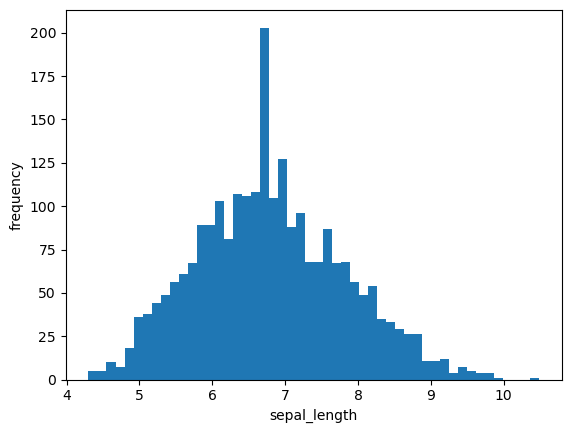

In [86]:
df1['sepal_length'].plot.hist(bins = 50, label = 'sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

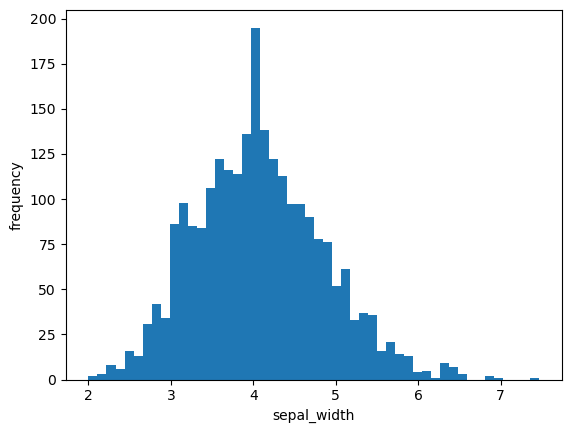

In [87]:
df1['sepal_width'].plot.hist(bins = 50, label = 'sepal_width')
plt.xlabel('sepal_width')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

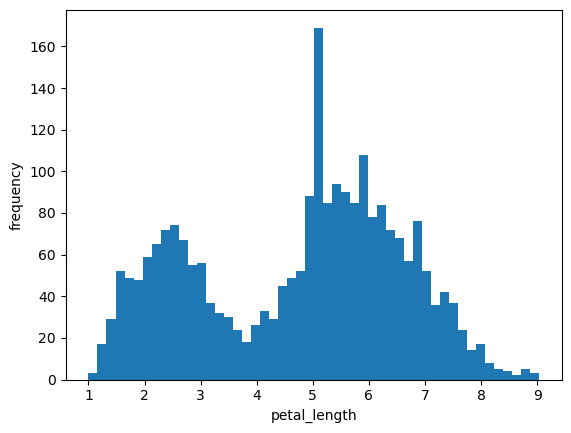

In [90]:
df1['petal_length'].plot.hist(bins = 50, label = 'petal_length')
plt.xlabel('petal_length')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

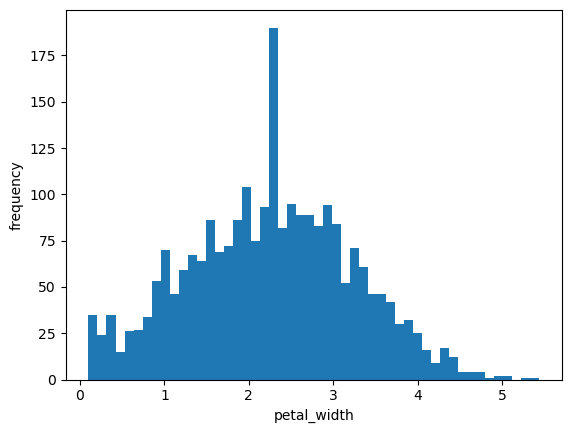

In [89]:
df1['petal_width'].plot.hist(bins = 50, label = 'petal_width')
plt.xlabel('petal_width')
plt.ylabel('frequency')

In [92]:
# As we can see now, distribution in columns # 0-3 became much better.
# But anyway it is far from ideal (assepecially in 'petal_width' column) but it looks "bell" shape much better that it was before

In [93]:
df1.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.292934,0.757407,0.731067
sepal_width,0.292934,1.000000,-0.011921,0.244492
petal_length,0.757407,-0.011921,1.000000,0.812569
petal_width,0.731067,0.244492,0.812569,1.000000


In [1]:
# df1.corr() shows us that, for example sepal_length has direct dependency to petal_length (the bigger sepal_length is, the bigger petal_length is). The same situation is VS sepal_width / petal_width
# But also we can see that sepal_width has reverce dependency to petal_length (the bigger sepal_length, the smaller petal_length and vice versa)
# I believe that bar chart can easily help us see if the distribution is normal or not, that's why I chose this type of visualisation to check
# I could have chosen replacimg nulls / 0 and belo zero values with avarages (mean()), but I guess that I wouldn't be 100% great sollution as mean is not always suitable (for example it'can be the same as if we count avarage sallary in EPAM by calculating: (Dobkin's salary + Juniour Accountant's salary)/2
